In [1]:
print("Bijin sanny; 20bci7117")

Bijin sanny; 20bci7117


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('books.csv')
df

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9788,23399022,23399022,42955411,21,525427651,9.780525e+12,"Amanda Berry, Gina DeJesus, Mary Jordan, Kevin...",2015.0,Hope,...,9102,927,101,195,1180,3301,4325,https://images.gr-assets.com/books/1421708177m...,https://images.gr-assets.com/books/1421708177s...,0
395,9847,20685373,20685373,40000267,18,307720659,9.780308e+12,Suki Kim,2014.0,"Without You, There Is No Us: My Time with the ...",...,10002,1426,145,523,2526,4328,2480,https://images.gr-assets.com/books/1405292426m...,https://images.gr-assets.com/books/1405292426s...,0
396,9887,503248,503248,491309,21,307381269,9.780307e+12,"Howard Dully, Charles Fleming",2007.0,My Lobotomy,...,9615,1247,142,788,2979,3585,2121,https://images.gr-assets.com/books/1320449273m...,https://images.gr-assets.com/books/1320449273s...,0
397,9960,127970,127970,1066433,26,739416383,9.780739e+12,Terry Ryan,2001.0,"The Prize Winner of Defiance, Ohio: How My Mot...",...,11151,1849,118,498,2739,4816,2980,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0


In [3]:
#Question 1

rows,columns=df.shape
print("rows =",rows, " \ncolumns=",columns)

rows = 399  
columns= 24


In [4]:
#Question 2

null_book_title=df["original_title"].isnull().sum()
print("Number of books having no original title is ",null_book_title,".")


Number of books having no original title is  36 .


In [5]:
#Question 3

book_id_column=df[["book_id","original_title"]].dropna()
unique_book_id_row=book_id_column["book_id"].unique().shape
print("Unique not null book_id is",unique_book_id_row[0])

Unique not null book_id is 363


In [6]:
#Question 4

print("Average rating of all the books are ",round(np.mean(df["average_rating"]),3))

Average rating of all the books are  3.984


In [7]:
#Question 5

print("Number of books published in the year 2000 are ",df.loc[df["original_publication_year"]==2000].shape[0])

Number of books published in the year 2000 are  8


In [8]:
#Question 6

max_rating_count=df["work_ratings_count"].max()
row_with_max_rating=df.loc[df["work_ratings_count"]==max_rating_count]
print("Book which has the maximum number of ratings is ",row_with_max_rating["original_title"].to_string(index=False))

Book which has the maximum number of ratings is  Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1...


In [9]:
#Question 7

#Converting rating to required format
average_rating_col=df["average_rating"]
def rating_roundoff(i):
    if(i%1<0.5):
        i=i//1
    elif(i%1>0.5):
        i=i//1+0.5
    return i


#arr=[3.19,2.5,3.9]
#r=map(rating_roundoff,arr)
#list(r)


In [10]:
rounded_average=list(map(rating_roundoff,average_rating_col))


In [11]:
import matplotlib.pyplot as plt 
rating_value= np.arange(0,5.5,0.5)
rating_occurance_count=pd.DataFrame(rounded_average).value_counts()
y=[]

for i in rating_value:
    if i in rating_occurance_count.index:
        y.append(rating_occurance_count[i])
    else:
        y.append(0)


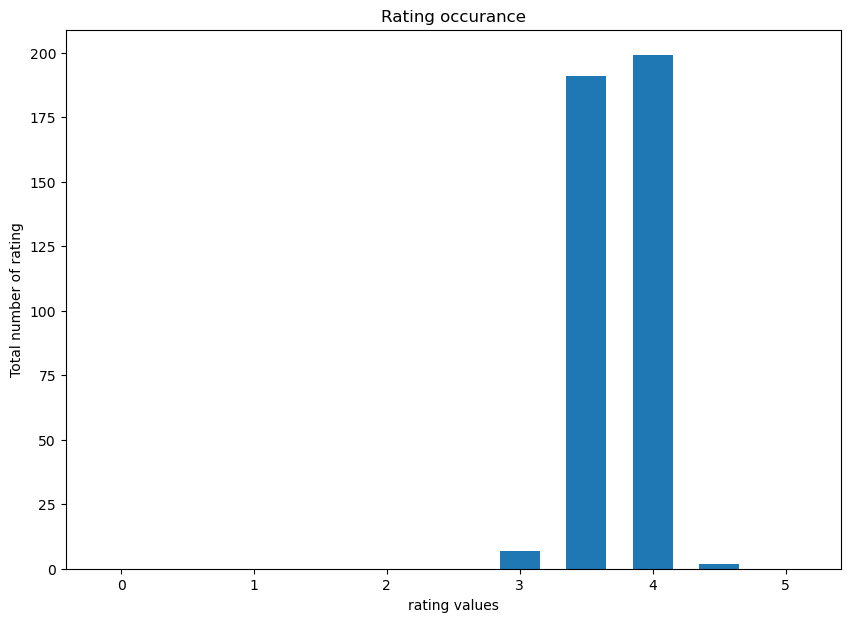

In [12]:
fig = plt.figure(figsize =(10, 7))

plt.bar(rating_value,y,width = 0.3)
plt.xlabel('rating values')
plt.ylabel('Total number of rating')
plt.title('Rating occurance')
plt.show()